Rebin Test
======

When looking at the rebinning, for run 270 some of the results looked weird. Let's go through and rebin this one, checking the results.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import pyne
import sap
pyne.__version__, sap.__version__

('0.5.1', '2017-04-21')

In [2]:
data = pyne.EVTData('../data_np/run270')
data.load_data()

r = sap.Rebinner()
r.create_arrays(width=10)

reading from ../data_np/run270...


In [3]:
data.adc[16].energies, data.adc[16].counts

(array([  -85.61467588,   -83.96130235,   -82.30792881, ...,  6681.6432165 ,
         6683.29659004,  6684.94996358]), array([0, 0, 0, ..., 0, 0, 0]))

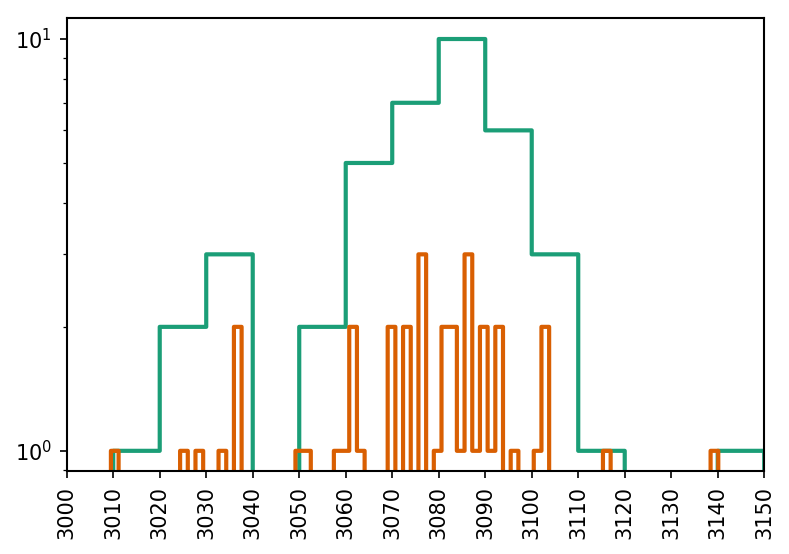

In [4]:
np.random.seed(10)

r.create_arrays(width=10)
c, e = r.rebin(data.adc[16])

plt.semilogy(e, c, nonposy='clip', linestyle='steps')
plt.semilogy(data.adc[16].energies, data.adc[16].counts, nonposy='clip', linestyle='steps')
plt.xlim(3000, 3150)
plt.xticks(np.arange(3000, 3160, 10), rotation='vertical')
plt.show()

In [5]:
c.sum(), data.adc[16].counts.sum()

(51.0, 51)

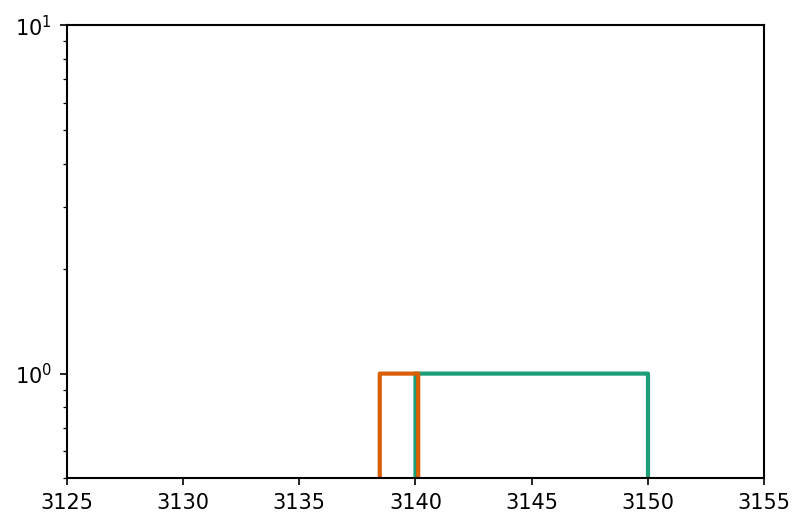

In [6]:
plt.semilogy(e, c, nonposy='clip', linestyle='steps')
plt.semilogy(data.adc[16].energies, data.adc[16].counts, nonposy='clip', linestyle='steps')
plt.xlim(3125, 3155)
plt.ylim(0.5, 10)
plt.show()

In [7]:
r.rb_energies[315]

3150.0

In [8]:
r.rb_energies[0]

0.0

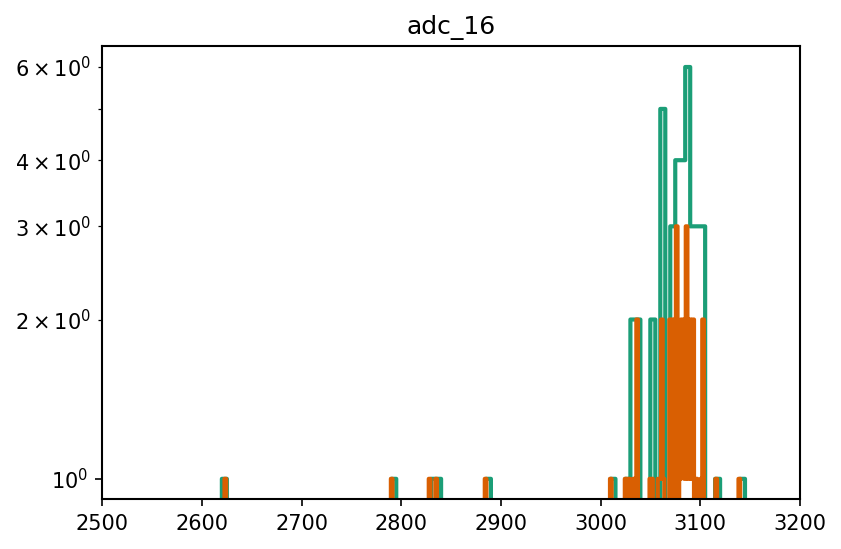

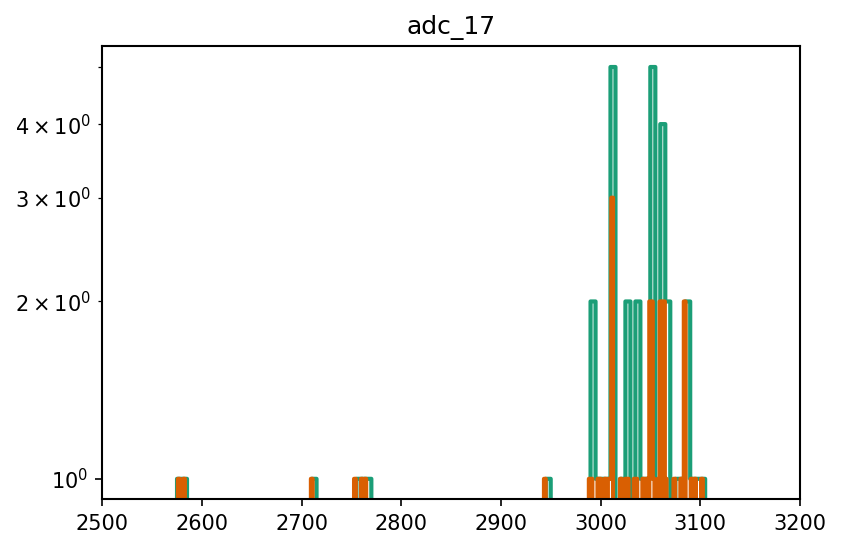

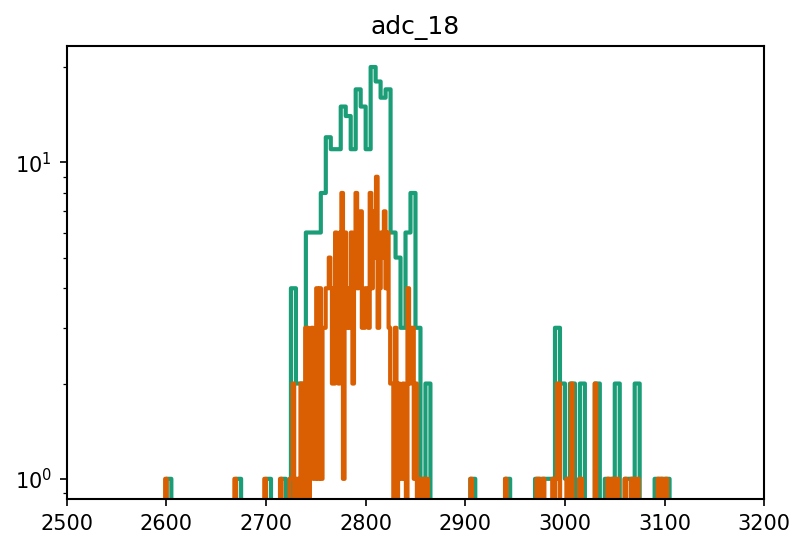

/opt/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/opt/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


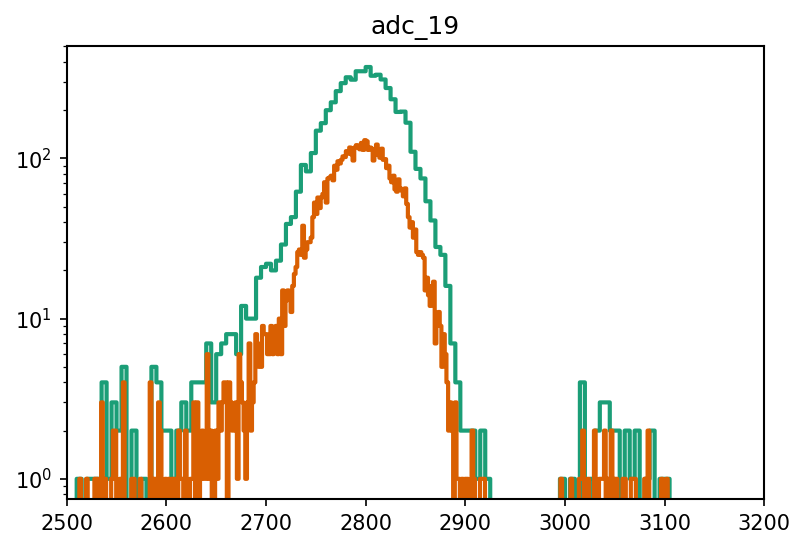

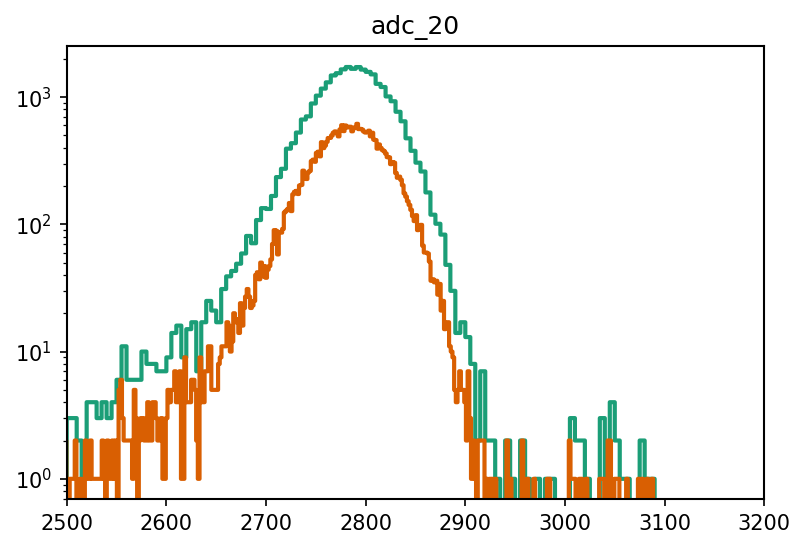

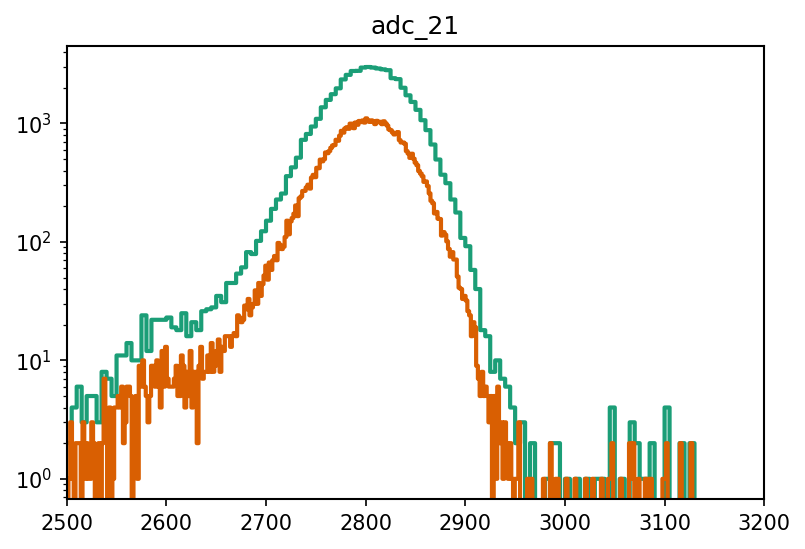

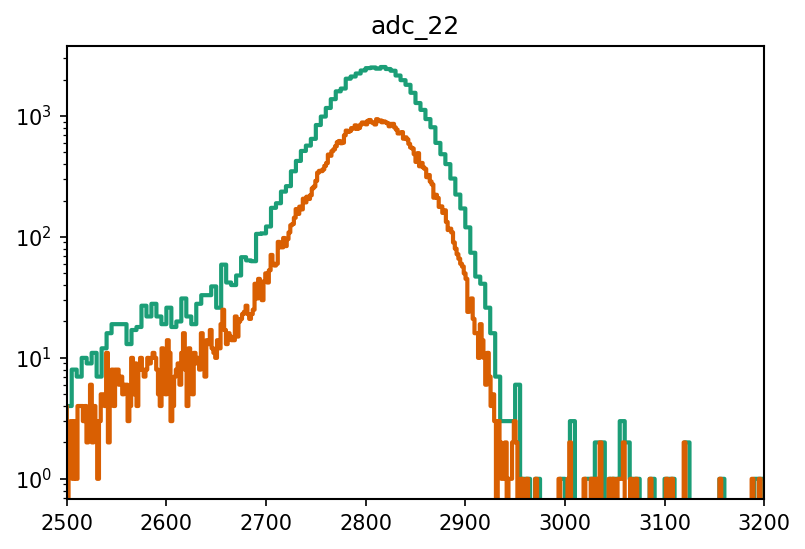

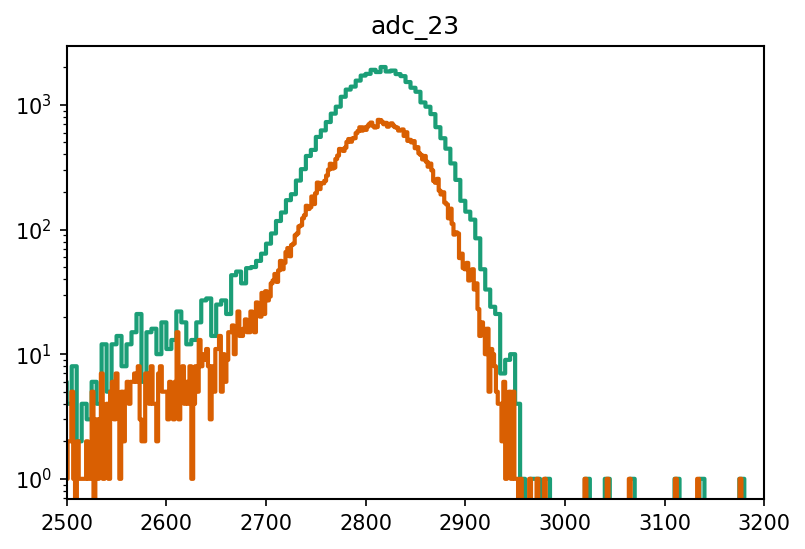

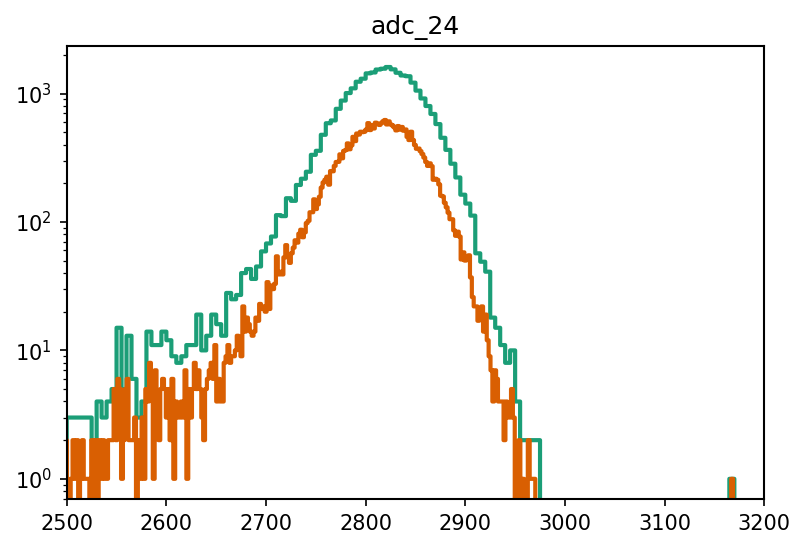

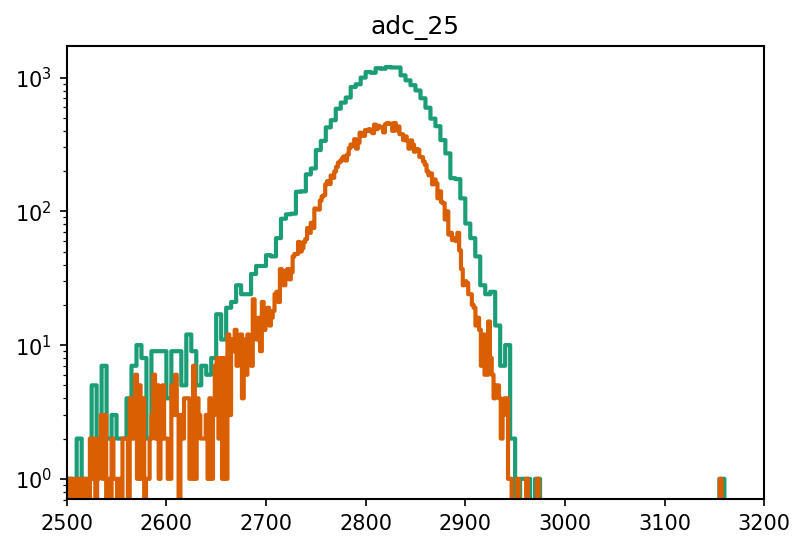

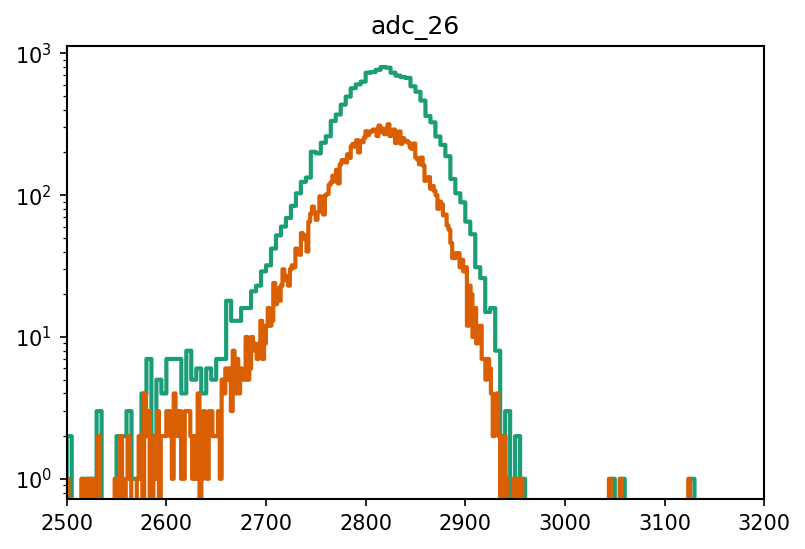

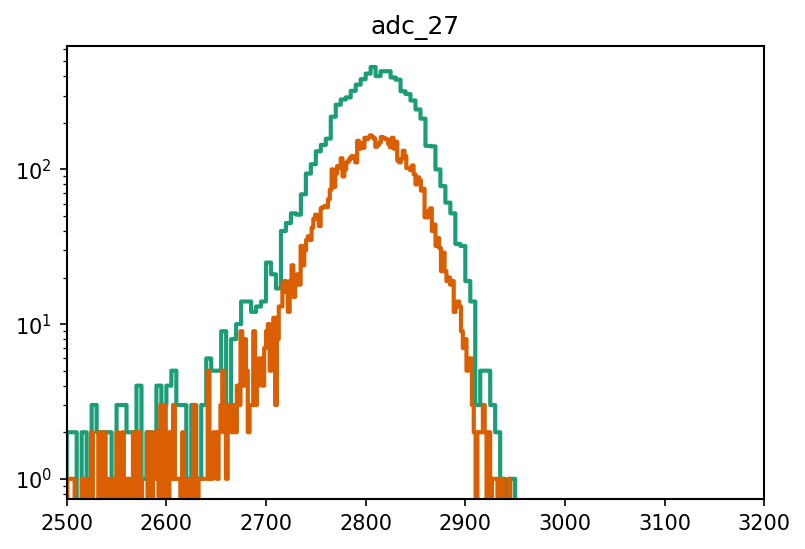

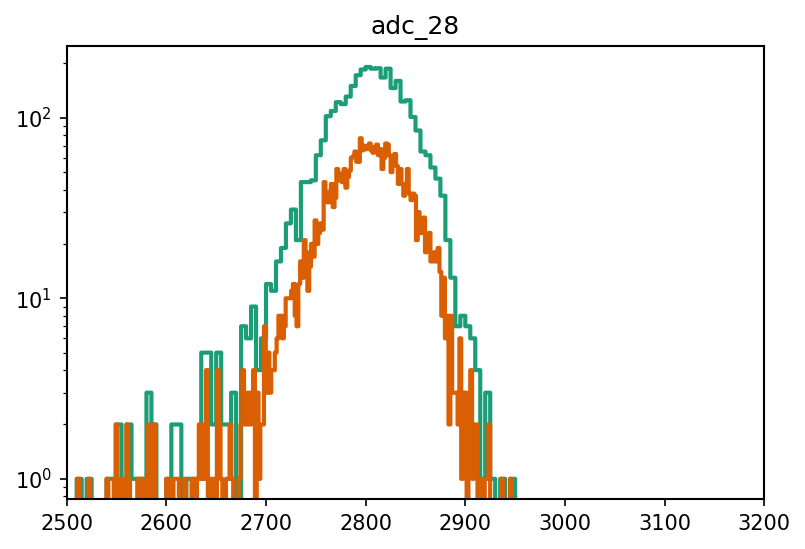

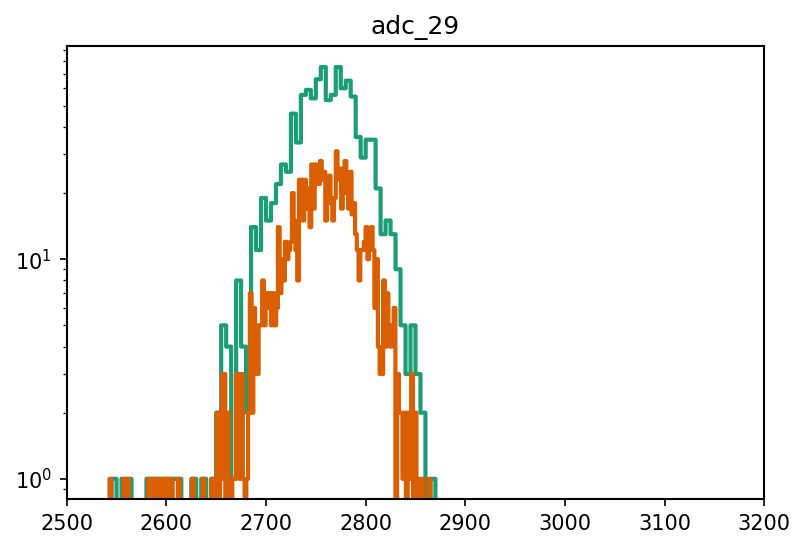

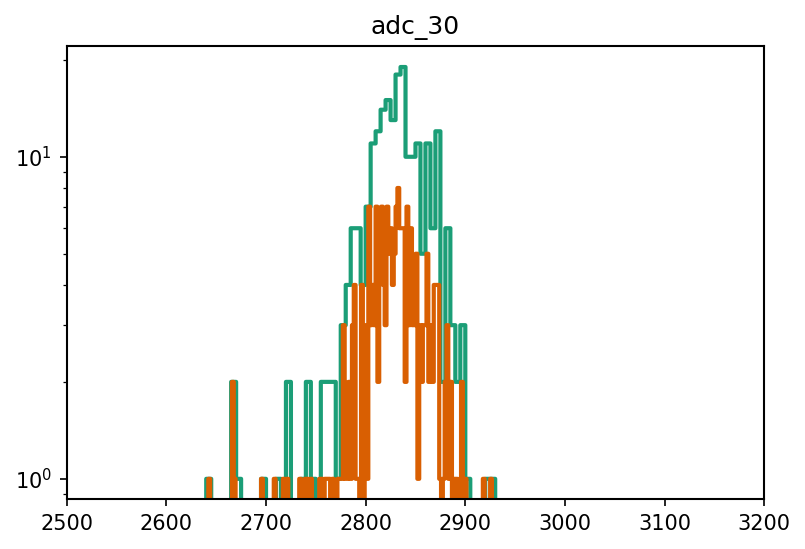

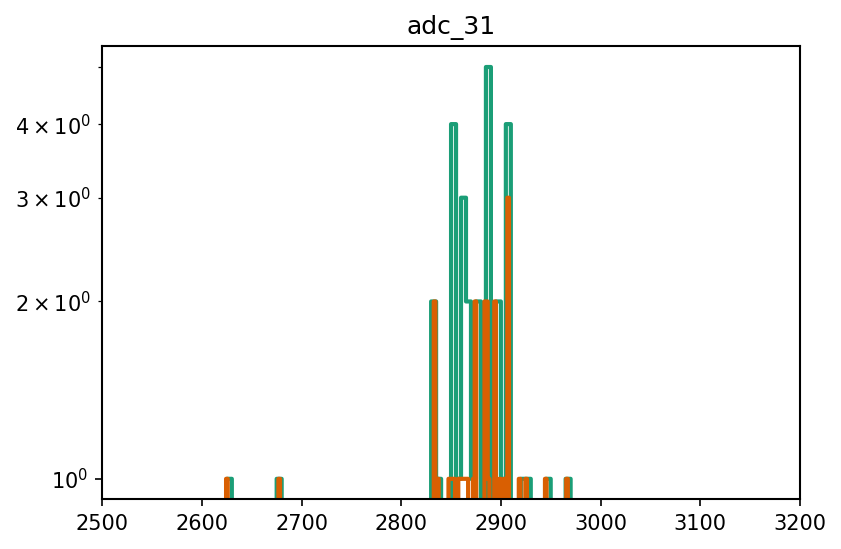

In [9]:
r.create_arrays(width=5)
for adc in data.adc[16:]:
    c, e = r.rebin(adc)
    plt.semilogy(e, c, nonposy='clip', linestyle='steps')
    plt.semilogy(adc.energies, adc.counts, nonposy='clip', linestyle='steps')
    plt.xlim(2500, 3200)
    plt.title(adc.name)
    plt.show()

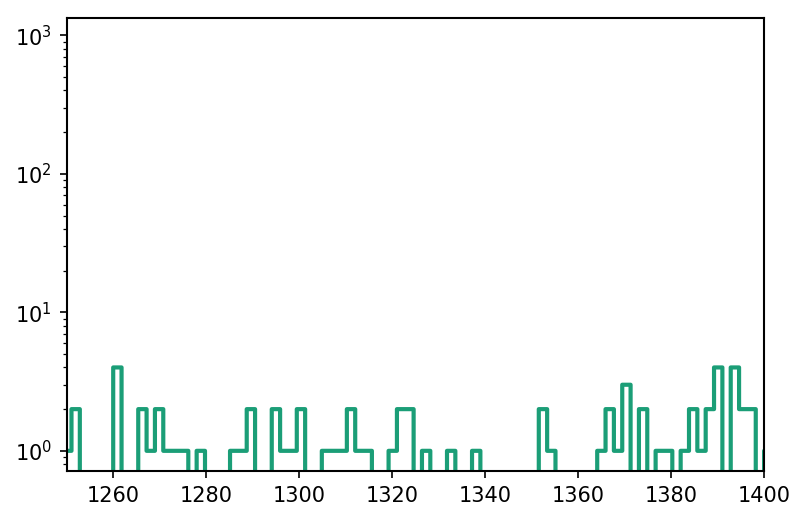

In [10]:
adc = data.adc[22]
plt.semilogy(adc.energies, adc.counts, nonposy='clip', linestyle='steps')
plt.xlim(1250, 1400)
plt.show()

Conclusion
------------

Rebinning now works, following some edits! Additionally, plotting routines in `sap.Display` changed to use regular steps instead of mid steps.